In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#imported the train and validation dataset
data_set = pd.read_csv(r'C:\Users\Waqas Nasir\Desktop\106 - scikit-learn-data\Test.csv\TrainAndValid.csv', low_memory=False)

In [3]:
data_set.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# dataset has a dates column, so lets parse it by reimprting the dataset
data_set = pd.read_csv(r'C:\Users\Waqas Nasir\Desktop\106 - scikit-learn-data\Test.csv\TrainAndValid.csv', low_memory=False, parse_dates=['saledate'])

In [5]:
data_set.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_set.shape

(412698, 53)

In [7]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

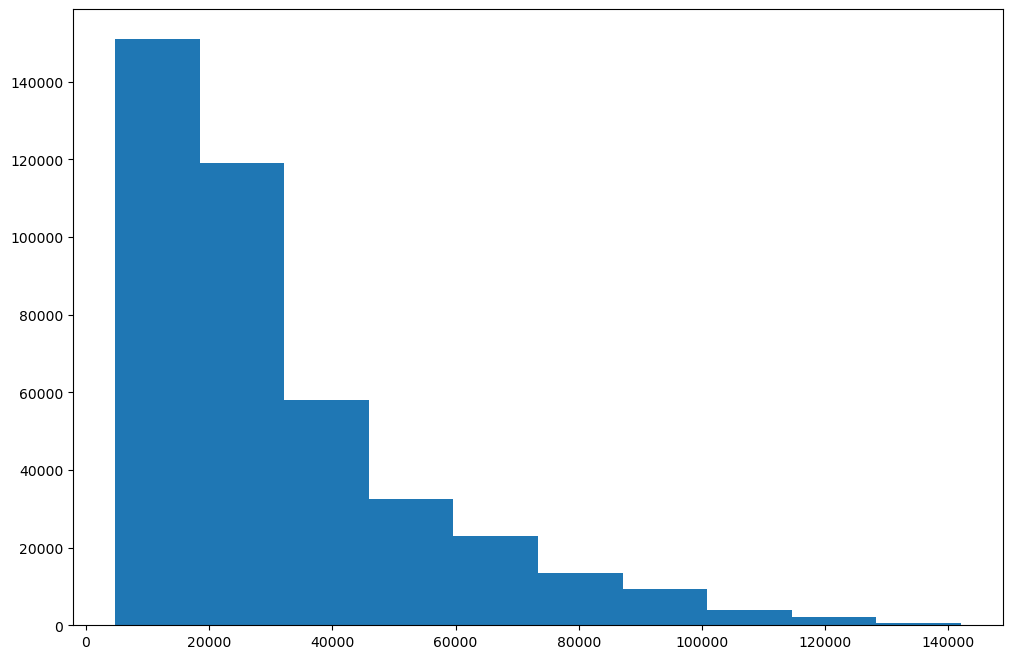

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
plot = ax.hist(data_set.SalePrice)

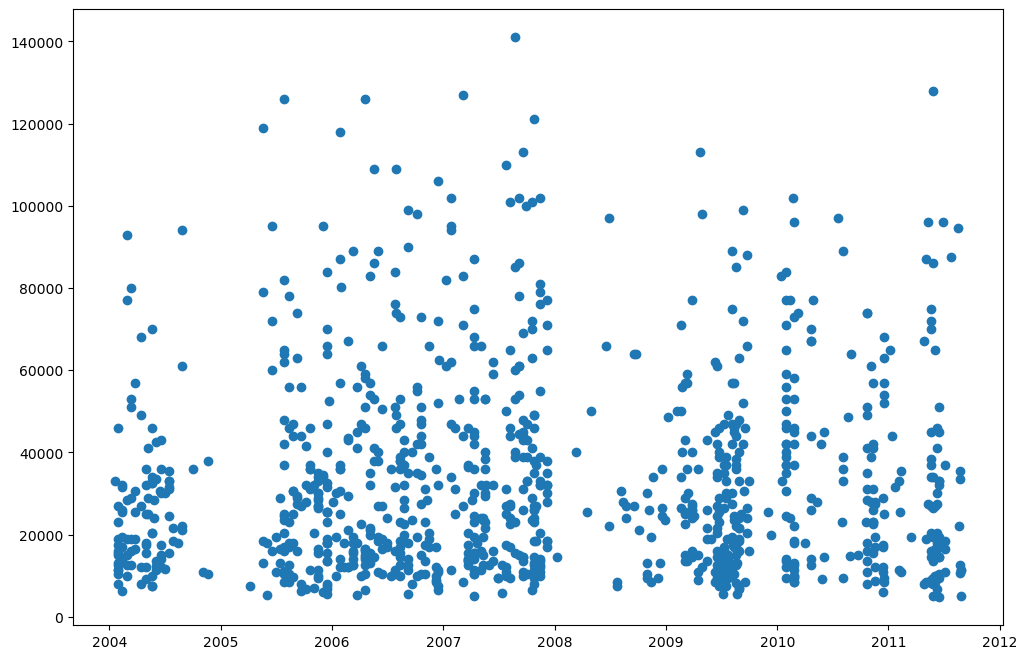

In [11]:
fig, ax = plt.subplots(figsize=(12, 8))
plot = ax.scatter(data_set.saledate[:1000], data_set.SalePrice[:1000]);

In [9]:
# find which columns have null values
data_set.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [10]:
# find which numerical column has null value
for label, content in data_set.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [11]:
# find which non-numeric columns have null values
count = 0
for label, content in data_set.items():
    if pd.api.types.is_string_dtype(content):
        if pd.isnull(content).sum():
            count += 1
            print(label, count)

UsageBand 1
fiSecondaryDesc 2
fiModelSeries 3
fiModelDescriptor 4
ProductSize 5
Drive_System 6
Enclosure 7
Forks 8
Pad_Type 9
Ride_Control 10
Stick 11
Transmission 12
Turbocharged 13
Blade_Extension 14
Blade_Width 15
Enclosure_Type 16
Engine_Horsepower 17
Hydraulics 18
Pushblock 19
Ripper 20
Scarifier 21
Tip_Control 22
Tire_Size 23
Coupler 24
Coupler_System 25
Grouser_Tracks 26
Hydraulics_Flow 27
Track_Type 28
Undercarriage_Pad_Width 29
Stick_Length 30
Thumb 31
Pattern_Changer 32
Grouser_Type 33
Backhoe_Mounting 34
Blade_Type 35
Travel_Controls 36
Differential_Type 37
Steering_Controls 38


In [12]:
# before manipulating data, it is good to have a copy of the original data
data_temp = data_set.copy()

In [13]:
data_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# there is a saledate column, so lets split it into multiple columns for a more berif dataset and numerical values
data_temp['year'] = data_temp.saledate.dt.year
data_temp['month'] = data_temp.saledate.dt.month
data_temp['day'] = data_temp.saledate.dt.day
data_temp['dayoftheweek'] = data_temp.saledate.dt.day_of_week
data_temp['dayoftheyear'] = data_temp.saledate.dt.day_of_year

In [15]:
data_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,year,month,day,dayoftheweek,dayoftheyear
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,Standard,Conventional,2006,11,16,3,320
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,Standard,Conventional,2004,3,26,4,86
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,2004,2,26,3,57
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,2011,5,19,3,139
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,2009,7,23,3,204


In [23]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [16]:
# saledate column has no value after above steps
data_temp.drop('saledate', axis=1)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,year,month,day,dayoftheweek,dayoftheyear
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,521D,...,NaN,NaN,NaN,Standard,Conventional,2006,11,16,3,320
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,950FII,...,NaN,NaN,NaN,Standard,Conventional,2004,3,26,4,86
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,226,...,NaN,NaN,NaN,NaN,NaN,2004,2,26,3,57
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,...,NaN,NaN,NaN,NaN,NaN,2011,5,19,3,139
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,S175,...,NaN,NaN,NaN,NaN,NaN,2009,7,23,3,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,30NX,...,NaN,NaN,NaN,NaN,NaN,2012,3,7,2,67
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,30NX2,...,NaN,NaN,NaN,NaN,NaN,2012,1,28,5,28
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,30NX,...,NaN,NaN,NaN,NaN,NaN,2012,1,28,5,28
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,30NX,...,NaN,NaN,NaN,NaN,NaN,2012,3,7,2,67


# There are 2 numeric and 38 non-numeric columns have null values

* Firstly fill numeric values by its mean value

In [17]:
# create functions to do so
def num_filler(data):
    for label, content in data.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                data[label] = content.fillna(content.mean())
# this function converts string dtype in categoty
def cat_converter(data):
    for label, content in data.items():
        if pd.api.types.is_string_dtype(content):
            data[label] = content.astype('category').cat.as_ordered()

# this function converts categories into numeric values and fill the null values

def cat_filler(data):
    for label, content in data.items():
        if not pd.api.types.is_numeric_dtype(content):
            data[label] = pd.Categorical(content).codes + 1

In [18]:
num_filler(data_temp)
cat_converter(data_temp)
cat_filler(data_temp)

In [19]:
data_temp.isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
saledate                    0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock 

Now we have no null values in our datsaet

In [20]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              412698 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  412698 non-null  float64
 8   UsageBand                 412698 non-null  int8   
 9   saledate                  412698 non-null  int16  
 10  fiModelDesc               412698 non-null  int16  
 11  fiBaseModel               412698 non-null  int16  
 12  fiSecondaryDesc           412698 non-null  int16  
 13  fiModelSeries             412698 non-null  i

In [21]:
len(data_temp)

412698

# now lets train our model on whole data

In [22]:
%%time
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(data_temp.drop('SalePrice', axis=1), data_temp['SalePrice'])

CPU times: total: 27min 43s
Wall time: 29min 16s


RandomForestRegressor()

In [23]:
model.score(data_temp.drop('SalePrice', axis=1), data_temp['SalePrice'])

0.9878517979895265

In [24]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [25]:
data_temp['year']

0         2006
1         2004
2         2004
3         2011
4         2009
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: year, Length: 412698, dtype: int64

In [26]:
data_temp.year.value_counts()

2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: year, dtype: int64

# Splitting data into train and validation sets

In [27]:
data_train = data_temp[data_temp.year!=2012]
data_val = data_temp[data_temp.year==2012]

In [28]:
data_train.tail()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,year,month,day,dayoftheweek,dayoftheyear
401120,6333336,10500.0,1840702,21439,149,1.0,2005,3522.988285,0,3876,...,0,0,0,0,0,2011,11,2,2,306
401121,6333337,11000.0,1830472,21439,149,1.0,2005,3522.988285,0,3876,...,0,0,0,0,0,2011,11,2,2,306
401122,6333338,11500.0,1887659,21439,149,1.0,2005,3522.988285,0,3876,...,0,0,0,0,0,2011,11,2,2,306
401123,6333341,9000.0,1903570,21435,149,2.0,2005,3522.988285,0,3869,...,0,0,0,0,0,2011,10,25,1,298
401124,6333342,7750.0,1926965,21435,149,2.0,2005,3522.988285,0,3869,...,0,0,0,0,0,2011,10,25,1,298


In [29]:
data_val.head(10)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,year,month,day,dayoftheweek,dayoftheyear
401125,1222837,31000.0,902859,1376,121,3.0,1000,0.0,0,3922,...,0,0,0,0,0,2012,1,5,3,5
401126,1222839,54000.0,1048320,36526,121,3.0,2006,4412.0,3,3922,...,0,0,0,0,0,2012,1,5,3,5
401127,1222841,26500.0,999308,4587,121,3.0,2000,10127.0,3,3922,...,0,0,0,0,0,2012,1,5,3,5
401128,1222843,10000.0,1062425,1954,121,3.0,1000,4682.0,2,3922,...,0,0,0,0,0,2012,1,5,3,5
401129,1222845,35000.0,1032841,4701,121,3.0,2002,8150.0,3,3921,...,0,0,0,4,2,2012,1,4,2,4
401130,1222847,8000.0,530790,7019,121,3.0,2001,0.0,0,3922,...,0,0,0,0,0,2012,1,5,3,5
401131,1222849,33000.0,1040520,3854,121,3.0,1000,1529.0,2,3922,...,0,0,0,4,2,2012,1,5,3,5
401132,1222850,33500.0,1061730,3854,121,3.0,1000,3998.0,2,3922,...,0,0,0,4,2,2012,1,5,3,5
401133,1222855,66000.0,531393,23926,121,3.0,1000,8145.0,2,3921,...,0,0,0,0,0,2012,1,4,2,4
401134,1222863,25000.0,317287,4106,121,3.0,2002,3211.0,2,3922,...,1,6,6,0,0,2012,1,5,3,5


In [30]:
len(data_train), len(data_val)

(401125, 11573)

In [31]:
data_train.shape, data_val.shape

((401125, 58), (11573, 58))

In [32]:
X_train, y_train = data_train.drop('SalePrice', axis=1), data_train['SalePrice']
X_val, y_val = data_val.drop('SalePrice', axis=1), data_val['SalePrice'] 

In [33]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((401125, 57), (401125,), (11573, 57), (11573,))

In [34]:
# now creating a function to evaluate our model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_log_error
def rmsle(y_preds, y_test):
    
    return np.sqrt(mean_squared_log_error(y_test, y_preds))


def show_scores(model):
    train_preds = model.predict(X_train)
    validation_preds = model.predict(X_val)
    
    scores = { "Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_val, validation_preds),
              "Training rmsle": rmsle(y_train, train_preds),
              "Valid rmsle": rmsle(y_val, validation_preds),
              "Training r^2": r2_score(y_train, train_preds),
              "Valid r^2": r2_score(y_val, validation_preds)
        
    }
    return scores


In [35]:
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42,
                             max_samples=10000)

In [36]:
model.fit(X_train, y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [37]:
show_scores(model)

{'Training MAE': 5475.7998406481765,
 'Valid MAE': 7262.331386848699,
 'Training rmsle': 0.2554400293843315,
 'Valid rmsle': 0.29956465639888474,
 'Training r^2': 0.863683966332225,
 'Valid r^2': 0.8299842839365459}

# Hyperparameter tuning by using RandomizedSearchCV

In [41]:
%%time
from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": np.arange(10, 110, 10),
          "max_depth":[None, 3, 5, 10],
          "min_samples_split":np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2),
          "max_features": [0.5, 1, 'sqrt', 'auto'],
          "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42), param_distributions=rf_grid,
                             n_iter=2, cv=5, verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 17.1 s
Wall time: 46.7 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   verbose=True)

In [42]:
rs_model.best_params_

{'n_estimators': 80,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 'sqrt',
 'max_depth': None}

In [43]:
show_scores(rs_model)

{'Training MAE': 6936.971100961328,
 'Valid MAE': 8703.890342634324,
 'Training rmsle': 0.3121322679749399,
 'Valid rmsle': 0.3558245105118714,
 'Training r^2': 0.7934042845228939,
 'Valid r^2': 0.7704698121340467}

# Train a Model with best prams

In [44]:
%%time
ideal_model = RandomForestRegressor(n_estimators=80,
                                   min_samples_split=10,
                                   min_samples_leaf=3,
                                   max_samples=10000,
                                   max_features='sqrt',
                                   max_depth=None,
                                   random_state=42)
ideal_model.fit(X_train, y_train)

CPU times: total: 5.5 s
Wall time: 6.67 s


RandomForestRegressor(max_features='sqrt', max_samples=10000,
                      min_samples_leaf=3, min_samples_split=10, n_estimators=80,
                      random_state=42)

In [45]:
show_scores(ideal_model)

{'Training MAE': 6936.971100961328,
 'Valid MAE': 8703.890342634324,
 'Training rmsle': 0.3121322679749399,
 'Valid rmsle': 0.3558245105118714,
 'Training r^2': 0.7934042845228939,
 'Valid r^2': 0.7704698121340467}

In [46]:
show_scores(rs_model)

{'Training MAE': 6936.971100961328,
 'Valid MAE': 8703.890342634324,
 'Training rmsle': 0.3121322679749399,
 'Valid rmsle': 0.3558245105118714,
 'Training r^2': 0.7934042845228939,
 'Valid r^2': 0.7704698121340467}

# Now Make perdictions on Test Data

In [69]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,year,month,day,dayoftheweek,dayoftheyear
0,1139246,999089,3157,121,3.0,2004,68.0,2,2647,963,...,0,0,0,4,2,2006,11,16,3,320
1,1139248,117657,77,121,3.0,1996,4640.0,2,2148,1745,...,0,0,0,4,2,2004,3,26,4,86
2,1139249,434808,7009,121,3.0,2001,2838.0,1,2131,336,...,0,0,0,0,0,2004,2,26,3,57
3,1139251,1026470,332,121,3.0,2001,3486.0,1,3753,3716,...,0,0,0,0,0,2011,5,19,3,139
4,1139253,1057373,17311,121,3.0,2007,722.0,3,3281,4261,...,0,0,0,0,0,2009,7,23,3,204


In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 0 to 401124
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   MachineID                 401125 non-null  int64  
 2   ModelID                   401125 non-null  int64  
 3   datasource                401125 non-null  int64  
 4   auctioneerID              401125 non-null  float64
 5   YearMade                  401125 non-null  int64  
 6   MachineHoursCurrentMeter  401125 non-null  float64
 7   UsageBand                 401125 non-null  int8   
 8   saledate                  401125 non-null  int16  
 9   fiModelDesc               401125 non-null  int16  
 10  fiBaseModel               401125 non-null  int16  
 11  fiSecondaryDesc           401125 non-null  int16  
 12  fiModelSeries             401125 non-null  int8   
 13  fiModelDescriptor         401125 non-null  i

In [71]:
test_data = pd.read_csv(r'C:\Users\Waqas Nasir\Desktop\106 - scikit-learn-data\Test.csv\Test.csv', parse_dates=['saledate'])

In [72]:
test_data.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [73]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [74]:
test_data['year'] = test_data.saledate.dt.year
test_data['month'] = test_data.saledate.dt.month
test_data['day'] = test_data.saledate.dt.day
test_data['dayoftheweek'] = test_data.saledate.dt.day_of_week
test_data['dayoftheyear'] = test_data.saledate.dt.day_of_year

In [75]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [76]:
test_data.shape

(12457, 57)

In [54]:
test_data=test_data.drop('saledate', axis=1)

In [77]:
test_data.shape

(12457, 57)

In [78]:
num_filler(test_data)
cat_converter(test_data)
cat_filler(test_data)

In [79]:
test_data.shape

(12457, 57)

In [58]:
test_data.isna().sum()

SalesID                     0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper                      0
Scarifier 

In [80]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   12457 non-null  int64  
 1   MachineID                 12457 non-null  int64  
 2   ModelID                   12457 non-null  int64  
 3   datasource                12457 non-null  int64  
 4   auctioneerID              12457 non-null  int64  
 5   YearMade                  12457 non-null  int64  
 6   MachineHoursCurrentMeter  12457 non-null  float64
 7   UsageBand                 12457 non-null  int8   
 8   saledate                  12457 non-null  int16  
 9   fiModelDesc               12457 non-null  int16  
 10  fiBaseModel               12457 non-null  int16  
 11  fiSecondaryDesc           12457 non-null  int8   
 12  fiModelSeries             12457 non-null  int8   
 13  fiModelDescriptor         12457 non-null  int8   
 14  Produc

In [83]:
test_predictions = ideal_model.predict(test_data)

In [84]:
test_predictions

array([23466.99893151, 24365.3047479 , 49988.43005952, ...,
       27044.74416787, 33008.0869709 , 33392.70502646])

In [87]:
df_predict_values = pd.DataFrame()
df_predict_values['SalesID'] = test_data['SalesID']
df_predict_values['SalesPrice'] = test_predictions

In [88]:
df_predict_values

,SalesID,SalesPrice
0,1227829,23466.998932
1,1227844,24365.304748
2,1227847,49988.430060
3,1227848,51026.569531
4,1227863,42023.956079
...,...,...
12452,6643171,33435.295552
12453,6643173,33524.989539
12454,6643184,27044.744168
12455,6643186,33008.086971


In [89]:
df_predict_values.isna().sum()

SalesID       0
SalesPrice    0
dtype: int64

In [91]:
df_predict_values.to_csv(r'C:\Users\Waqas Nasir\Desktop\106 - scikit-learn-data\Test.csv\predict_prices.csv', index=False)

# Feature Importance
Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target variable (SalePrice).

In [92]:
ideal_model.feature_importances_

array([0.02477283, 0.03996377, 0.057723  , 0.0036277 , 0.00621082,
       0.12123961, 0.00674804, 0.00332947, 0.02941674, 0.04856643,
       0.03424006, 0.07410266, 0.0093885 , 0.0366866 , 0.07556572,
       0.04239372, 0.00838598, 0.01531861, 0.0247634 , 0.00509713,
       0.06588207, 0.00821511, 0.00691179, 0.00565374, 0.00213426,
       0.00541406, 0.0045462 , 0.00490001, 0.00571647, 0.00366906,
       0.00440281, 0.01039907, 0.01014431, 0.01225125, 0.00194628,
       0.01028611, 0.01557657, 0.00446752, 0.0182859 , 0.01349949,
       0.01536382, 0.00971815, 0.00308603, 0.0076671 , 0.00160511,
       0.00307601, 0.00390725, 0.00119851, 0.00916803, 0.00621521,
       0.00242763, 0.00298977, 0.0217525 , 0.00651585, 0.00830151,
       0.00489269, 0.01027191])

# helper funtion for plotting the feature importance 

In [95]:
def feature_drawer(columns, importance, n=20):
    df = (pd.DataFrame({"Feature": columns,
                      "Importance":importance}).sort_values("Importance", ascending=False).reset_index(drop=True))
    fig, ax = plt.subplots()
    plot = ax.barh(df["Feature"][:n], df["Importance"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Importance")
    ax.invert_yaxis()

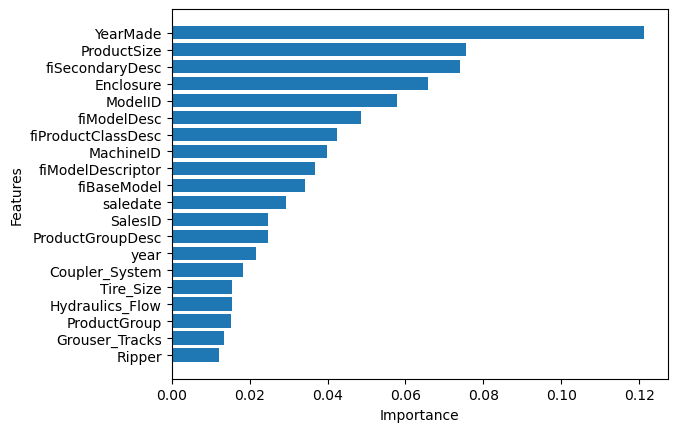

In [96]:
feature_drawer(X_train.columns, ideal_model.feature_importances_)

In [100]:
from joblib import dump
dump(ideal_model, r'C:\Users\Waqas Nasir\Desktop\106 - scikit-learn-data\Bulldozer_price_predictor.joblib')

['C:\\Users\\Waqas Nasir\\Desktop\\106 - scikit-learn-data\\Bulldozer_price_predictor.joblib']